<a href="https://colab.research.google.com/github/Jasxpreet/Data-Science-Assignments/blob/main/Hypothesis_%26_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Hypothesis Testing and Inference

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

In [ ]:
# Load the dataset
df = pd.read_csv("C:/Users/jsingh5/Downloads/dataset/insurance.csv")

In [ ]:
#Checking dimensions of dataset
df.shape

(1338, 7)

In [ ]:
# Display the first few rows of the dataset
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Summary statistics for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Display the data types of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

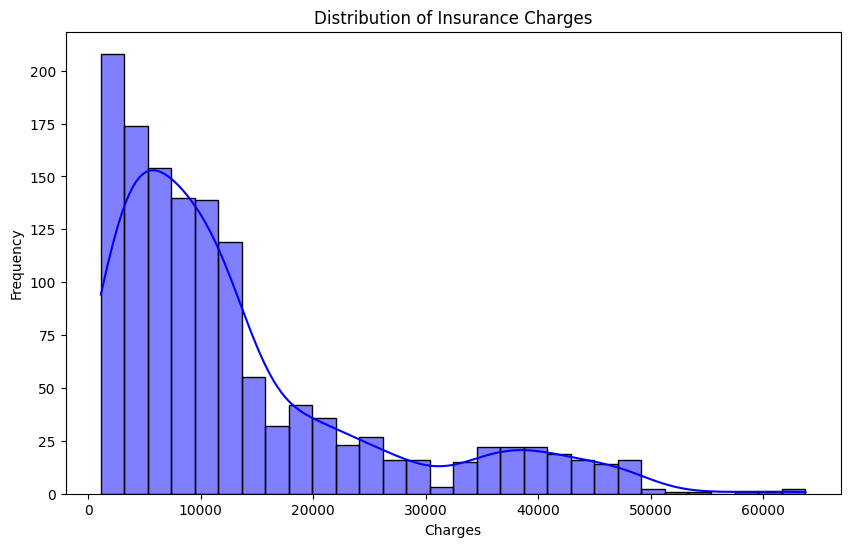

In [ ]:
#Plotting histogram to check charges(Skewness Found)
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

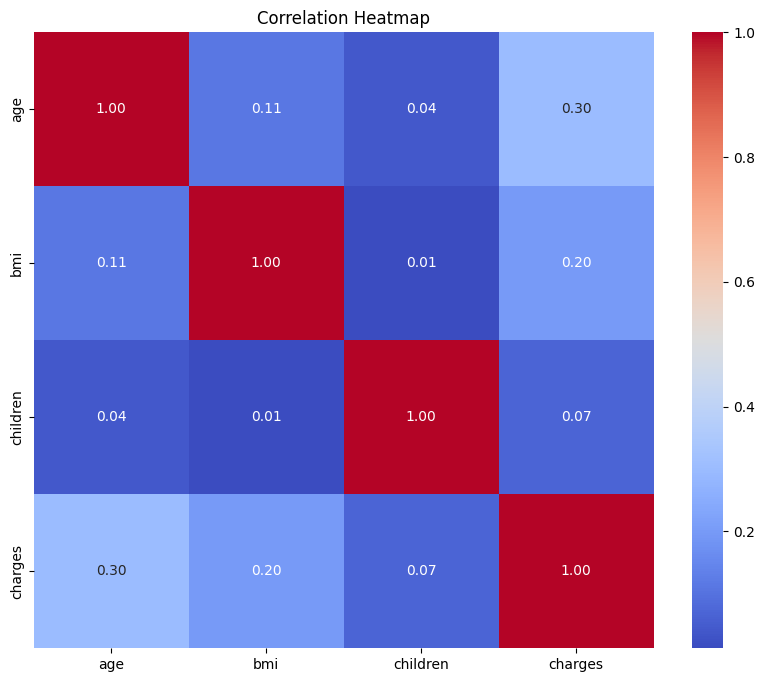

In [ ]:
# Compute correlation matrix (Numerics only)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

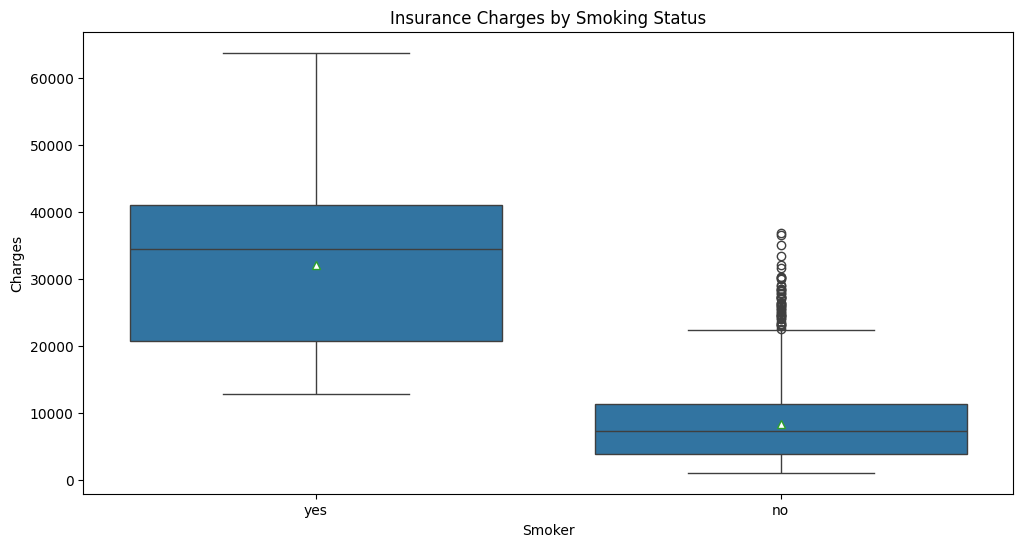

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=df,showmeans=True,meanprops=dict(markerfacecolor='white'))
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

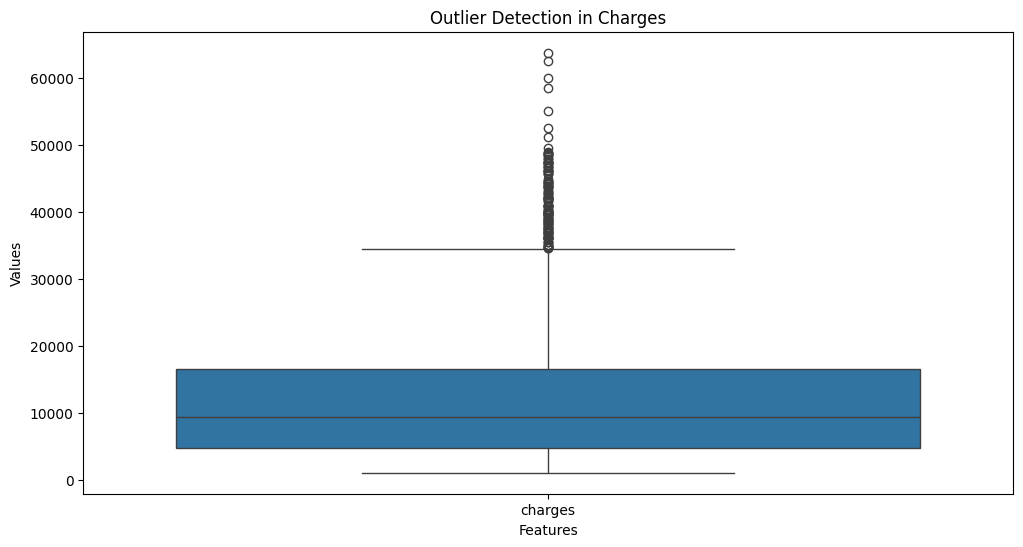

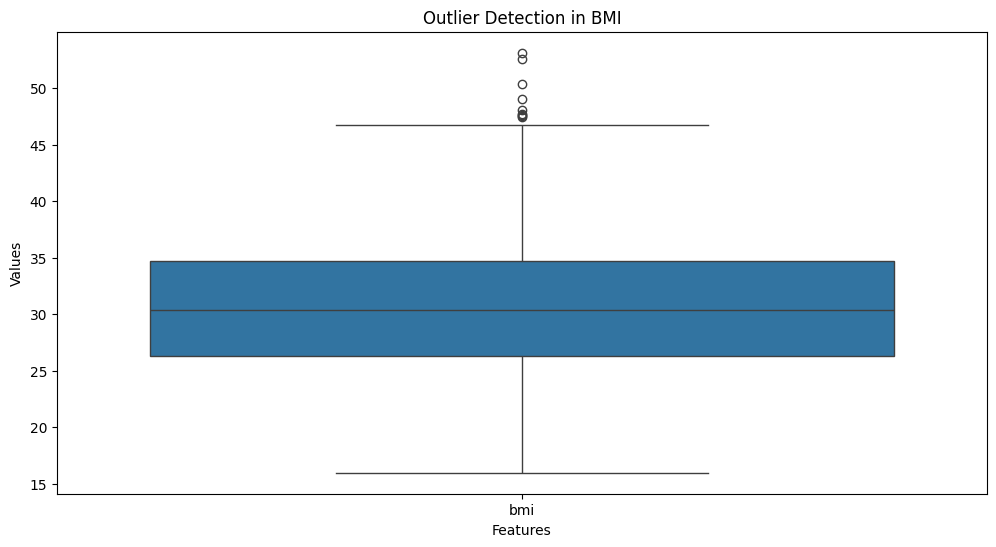

In [ ]:
#Outlier detection in charges and age

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['charges']])
plt.title('Outlier Detection in Charges')
plt.xlabel('Features')
plt.ylabel('Values')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['bmi']])
plt.title('Outlier Detection in BMI')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()


In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

# the outlier values
print(f"Number of outliers detected: {outliers.shape[0]}")
print(outliers[['charges']])

Number of outliers detected: 139
          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]


In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# the outlier values
print(f"Number of outliers detected: {outliers.shape[0]}")
print(outliers[['bmi']])

Number of outliers detected: 9
        bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13


In [ ]:
# Log-transform the charges to reduce skewness
df['log_charges'] = np.log(df['charges'])

In [ ]:
skewness_log_charges = df['log_charges'].skew()
print(f"Skewness after log transformation: {skewness_log_charges}")

Skewness after log transformation: -0.09009752473024582


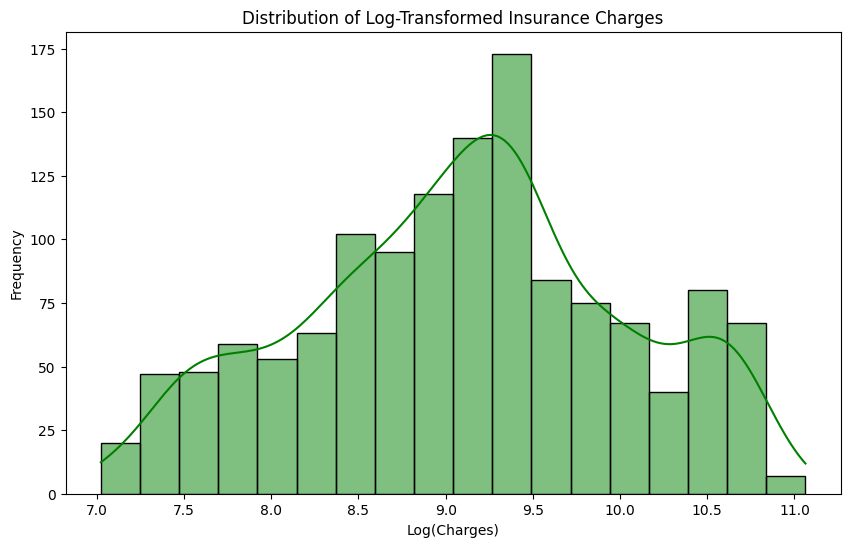

In [ ]:
#Showinf the reduction of skewness in charges
plt.figure(figsize=(10, 6))
sns.histplot(df['log_charges'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Insurance Charges')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')
plt.show()

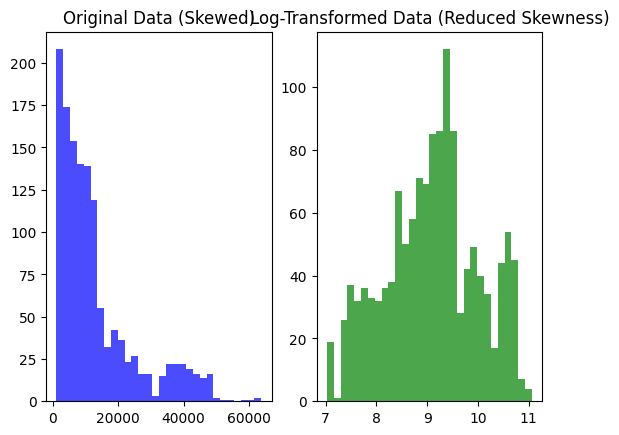

In [ ]:
#Comparison between original and transformed data
plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=30, color='blue', alpha=0.7)
plt.title("Original Data (Skewed)")

plt.subplot(1, 2, 2)
plt.hist(df['log_charges'], bins=30, color='green', alpha=0.7)
plt.title("Log-Transformed Data (Reduced Skewness)")

plt.show()

In [ ]:
# T-test for log_charges between smokers and non-smokers

smoker_log_charges = df[df['smoker'] == 'yes']['log_charges']
non_smoker_log_charges = df[df['smoker'] == 'no']['log_charges']
t_stat, p_value = stats.ttest_ind(smoker_log_charges, non_smoker_log_charges, equal_var=False)
print("\nT-Test for smoker vs non-smoker log_charges:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in charges between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in charges between smokers and non-smokers.")


T-Test for smoker vs non-smoker log_charges:
T-Statistic: 46.37084368606731, P-Value: 3.9165953769040334e-234
Reject the null hypothesis: There is a significant difference in charges between smokers and non-smokers.


In [ ]:
# Correlation between BMI and log_charge

correlation, corr_p_value = stats.pearsonr(df['bmi'], df['log_charges'])
print("\nCorrelation Test for BMI and log_charges:")
print(f"Correlation Coefficient: {correlation}, P-Value: {corr_p_value}")
if corr_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between BMI and log_charges.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between BMI and log_charges.")


Correlation Test for BMI and log_charges:
Correlation Coefficient: 0.1326693907035204, P-Value: 1.1166766497459922e-06
Reject the null hypothesis: There is a significant correlation between BMI and log_charges.


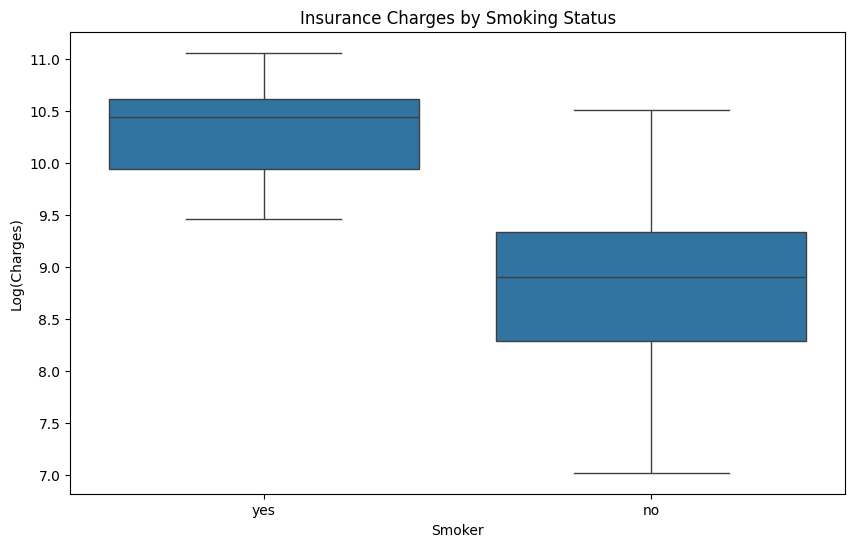

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='log_charges', data=df)
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Log(Charges)')
plt.show()

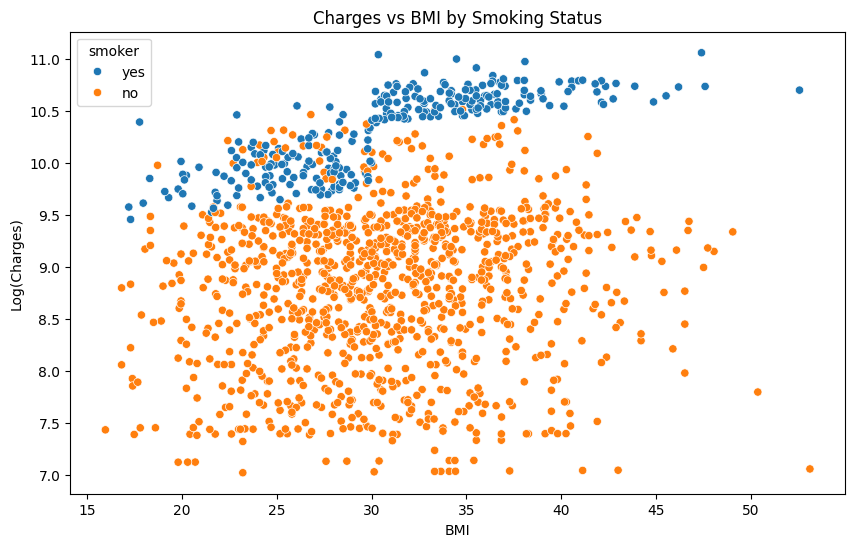

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='log_charges', hue='smoker', data=df)
plt.title('Charges vs BMI by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Log(Charges)')
plt.show()

# Part 2: Implementing Gradient Descent

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
#Encoding the dataset
df_encoded = pd.get_dummies(df, columns=['smoker', 'region','sex'], drop_first=True)

In [ ]:
df_encoded.head()

,age,bmi,children,charges,log_charges,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.900,0,16884.92400,9.734176,True,False,False,True,False
1,18,33.770,1,1725.55230,7.453302,False,False,True,False,True
2,28,33.000,3,4449.46200,8.400538,False,False,True,False,True
3,33,22.705,0,21984.47061,9.998092,False,True,False,False,True
4,32,28.880,0,3866.85520,8.260197,False,True,False,False,True


In [ ]:
#Feature Scaling
scaler = StandardScaler()
df_encoded[['age', 'bmi','children','log_charges']] = scaler.fit_transform(df_encoded[['age', 'bmi','children','log_charges']])

In [ ]:
df_encoded.head(10)

,age,bmi,children,charges,log_charges,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,-1.438764,-0.453320,-0.908614,16884.92400,0.691394,True,False,False,True,False
1,-1.509965,0.509621,-0.078767,1725.55230,-1.790020,False,False,True,False,True
2,-0.797954,0.383307,1.580926,4449.46200,-0.759500,False,False,True,False,True
3,-0.441948,-1.305531,-0.908614,21984.47061,0.978513,False,True,False,False,True
4,-0.513149,-0.292556,-0.908614,3866.85520,-0.912181,False,True,False,False,True
5,-0.584350,-0.807656,-0.908614,3756.62160,-0.943646,False,False,True,False,False
6,0.483668,0.455486,-0.078767,8240.58960,-0.089026,False,False,True,False,False
7,-0.157143,-0.479567,1.580926,7281.50560,-0.223640,False,True,False,False,False
8,-0.157143,-0.136714,0.751079,6406.41070,-0.362935,False,False,False,False,True
9,1.480485,-0.791252,-0.908614,28923.13692,1.276936,False,True,False,False,False


In [ ]:
X = df_encoded.drop(columns=['log_charges', 'charges'])
y = df_encoded['log_charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

           age       bmi  children  smoker_yes  region_northwest  \
560   0.483668 -1.757474  0.751079       False              True   
1285  0.554869 -1.040599 -0.908614       False             False   
1142  0.910875 -0.952015 -0.908614       False             False   
969  -0.014740  0.599846  3.240619       False             False   
486   1.053277 -1.508126  1.580926       False              True   
...        ...       ...       ...         ...               ...   
1095 -1.509965  0.112633  2.410772       False             False   
1130 -0.014740 -1.114419  3.240619       False             False   
1294  1.338082 -0.900341 -0.908614       False             False   
860  -0.157143  2.778356  0.751079        True             False   
1126  1.124479 -0.125231 -0.908614       False             False   

      region_southeast  region_southwest  sex_male  
560              False             False     False  
1285             False             False     False  
1142              True  

In [ ]:
def gradient_descent(X, y, theta, bias, learning_rate, iterations):
    # Ensure X and y are python lists instead of pandas dataframe
    if isinstance(X, pd.DataFrame):
        X = X.values.tolist()
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y = y.values.flatten().tolist()

    m = len(y)  # Number of training samples
    n = len(X[0])  # Number of features
    loss_history = []

    for i in range(iterations):
        # Shuffle the dataset at each iteration (optional but can help with convergence)
        indices = list(range(m))
        random.shuffle(indices)

        for idx in indices:
            # Get the current training sample
            X_sample = X[idx]
            y_sample = y[idx]

            # Predictions
            prediction = sum(X_sample[j] * theta[j] for j in range(n)) + bias

            # Error
            error = prediction - y_sample

            # Gradients
            gradient_theta = [error * X_sample[j] for j in range(n)]
            gradient_bias = error

            # Update parameters
            theta = [theta[j] - learning_rate * gradient_theta[j] for j in range(n)]
            bias -= learning_rate * gradient_bias

        # Calculate loss (Mean Squared Error)
        predictions = [sum(X[i][j] * theta[j] for j in range(n)) + bias for i in range(m)]
        errors = [predictions[k] - y[k] for k in range(m)]
        loss = (1 / (2 * m)) * sum(error**2 for error in errors)
        loss_history.append(loss)

        # Print loss at every 100th iteration
        if i % 10 == 0 or i == iterations - 1:
            print(f"Iteration {i}: Loss = {loss}")

    return theta, bias, loss_history

In [ ]:
# Call the function
m, n = X_train.shape
theta = [0]*n  # weights for each columns of X_train
bias = 0 #bias
learning_rate = 0.001
iterations = 50

theta, bias, loss_history = gradient_descent(X_train, y_train, theta, bias, learning_rate, iterations)

Iteration 0: Loss = 0.2999292089061659
Iteration 10: Loss = 0.12508410296031877
Iteration 20: Loss = 0.11952456395852169
Iteration 30: Loss = 0.11932497773827645
Iteration 40: Loss = 0.11928854792373059
Iteration 49: Loss = 0.11930864469029856


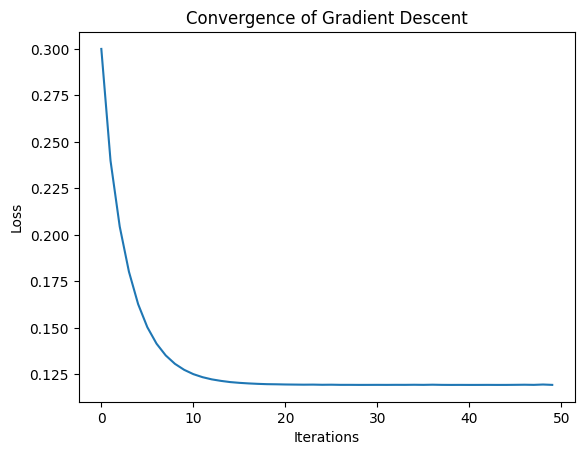

In [ ]:
plt.plot(range(len(loss_history)), loss_history)
plt.title("Convergence of Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
print(theta)
print()
print(bias)

[0.5164160925147012, 0.09230082277179463, 0.12300922575015018, 1.687105819435173, -0.061309105137131316, -0.14655398961179414, -0.13280229704607754, -0.08238706824683188]

-0.21020246594891068


In [ ]:
#Gradient descent model Performance
y_pred_gd = np.dot(X_test, theta) + bias
r2_score_gd=r2_score(y_test, y_pred_gd)
mae_gd=mean_absolute_error(y_test, y_pred_gd)
rmse_gd=np.sqrt(mean_squared_error(y_test, y_pred_gd))

print("\nEvaluation of Gradient Descent Model:")
print(f"R-squared: {r2_score_gd}")
print(f"Mean Absolute Error (MAE): {mae_gd}")
print(f"Root Mean Squared Error (RMSE): {rmse_gd}")


Evaluation of Gradient Descent Model:
R-squared: 0.8046204736080309
Mean Absolute Error (MAE): 0.2944766835003721
Root Mean Squared Error (RMSE): 0.4559856333347494


In [ ]:
#Linear regression using Sk Learn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
#SK Learn model Performance
r2_score_lr=r2_score(y_test, y_pred_lr)
mae_lr=mean_absolute_error(y_test, y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("\nEvaluation of Scikit-Learn LinearRegression Model:")
print(f"R-squared: {r2_score_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")


Evaluation of Scikit-Learn LinearRegression Model:
R-squared: 0.8047311493462987
Mean Absolute Error (MAE): 0.29340349986922554
Root Mean Squared Error (RMSE): 0.45585646500157284


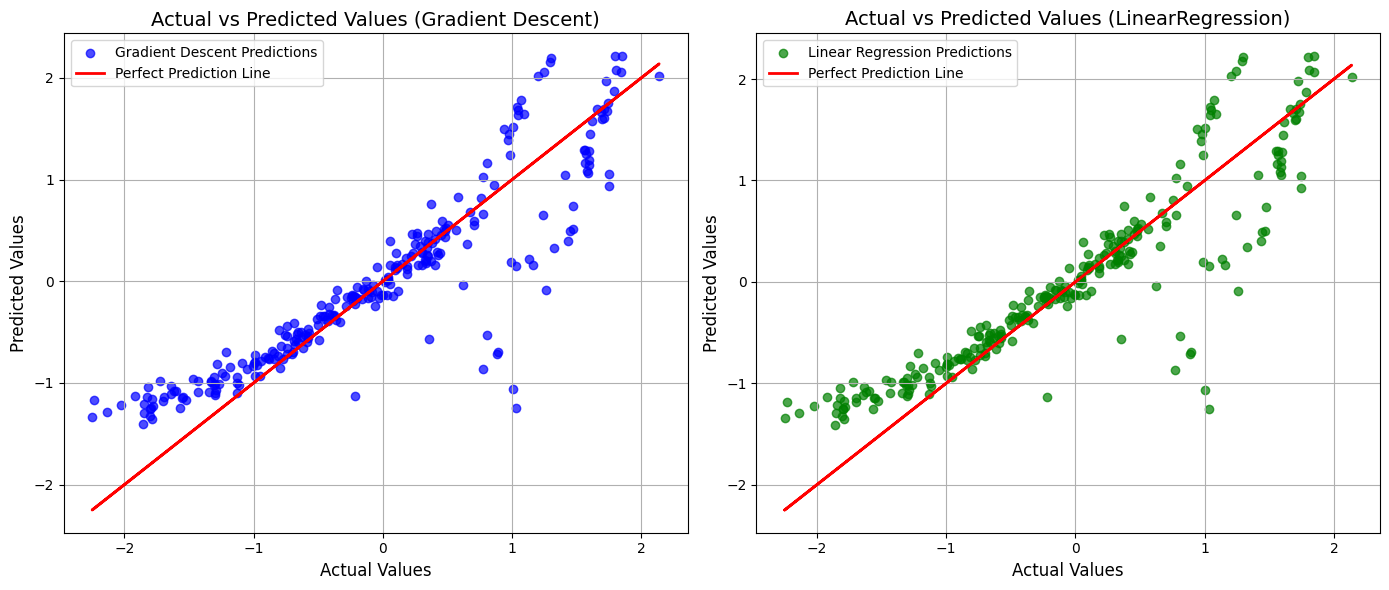

In [ ]:
plt.figure(figsize=(14, 6))

# Gradient Descent Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_gd, color='blue', alpha=0.7, label='Gradient Descent Predictions')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted Values (Gradient Descent)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)

# Scikit-Learn LinearRegression Model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green', alpha=0.7, label='Linear Regression Predictions')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted Values (LinearRegression)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

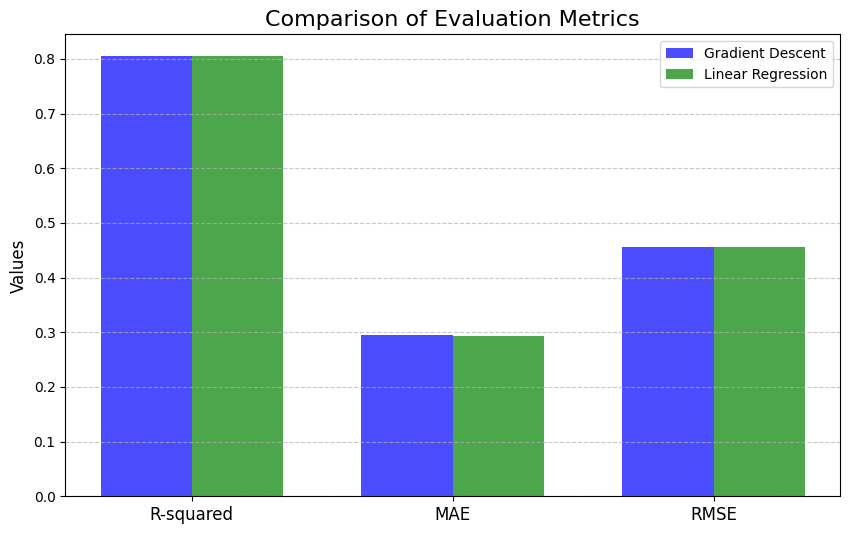

In [ ]:
metrics = ['R-squared', 'MAE', 'RMSE']
gd_values = [
    r2_score_gd,
    mae_gd,
    rmse_gd
]
lr_values = [
    r2_score_lr,
    mae_lr,
    rmse_lr
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, gd_values, width, label='Gradient Descent', color='blue', alpha=0.7)
plt.bar(x + width/2, lr_values, width, label='Linear Regression', color='green', alpha=0.7)

plt.title('Comparison of Evaluation Metrics', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.xticks(x, metrics, fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Iteration 0: Loss = 0.4549559335603006
Iteration 10: Loss = 0.29199827337686374
Iteration 20: Loss = 0.23590341183571875
Iteration 30: Loss = 0.20190407150880346
Iteration 40: Loss = 0.17826085386730683
Iteration 49: Loss = 0.16288506462288652
Iteration 0: Loss = 0.3002982587060792
Iteration 10: Loss = 0.12516589896549637
Iteration 20: Loss = 0.11948731188942556
Iteration 30: Loss = 0.11929938583646592
Iteration 40: Loss = 0.11929892049472025
Iteration 49: Loss = 0.1193060124434023
Iteration 0: Loss = 0.12969405495587377
Iteration 10: Loss = 0.12575231975825274
Iteration 20: Loss = 0.12093839586729306
Iteration 30: Loss = 0.12165470969636441
Iteration 40: Loss = 0.1202040135447275
Iteration 49: Loss = 0.12215882936837834
Iteration 0: Loss = 0.1825976145670827
Iteration 10: Loss = 0.12628244541847705
Iteration 20: Loss = 0.14080199927095882
Iteration 30: Loss = 0.24882814152294958
Iteration 40: Loss = 0.17017185551797848
Iteration 49: Loss = 0.15932886225558016
{0.0001: [0.4549559335603

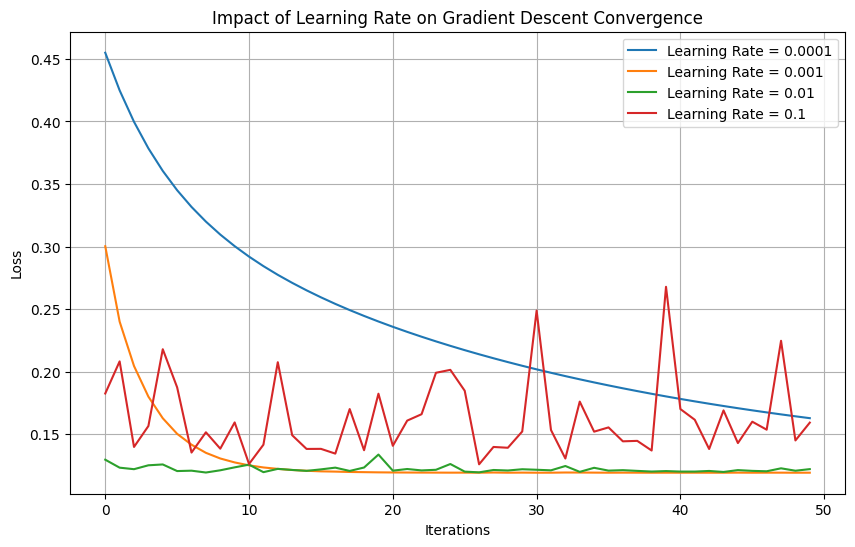

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Initialize parameters
m, n = X_train.shape
initial_theta = [0] * n
initial_bias = 0
iterations = 50

# Store results for plotting
loss_results = {}

for lr in learning_rates:
    # Convert DataFrames/Series to lists
    X_list = X_train.values.tolist()
    y_list = y_train.values.flatten().tolist()

    # Run gradient descent and store the loss history
    _,_,loss_history = gradient_descent(X_list, y_list, initial_theta[:], initial_bias, lr, iterations) #Adding _,_, cause function is returning three values, and we need loss_history to plot graph.
    loss_results[lr] = loss_history

print(loss_results)

# Plotting the convergence curves
plt.figure(figsize=(10, 6))

# Plot each learning rate's loss history with a label
for lr, losses in loss_results.items():
    plt.plot(range(len(losses)), losses, label=f"Learning Rate = {lr}")

plt.title("Impact of Learning Rate on Gradient Descent Convergence")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()  # This will use the labels passed in plt.plot() calls
plt.grid()
plt.show()


In [ ]:
def batch_gradient_descent(X, y, theta, bias, learning_rate, iterations):
    """
    Batch Gradient Descent Implementation.
    Updates all weights based on the entire dataset's gradient at each step.
    """
    # Convert to NumPy arrays (if not already) and ensure correct dtype
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    theta = np.array(theta, dtype=np.float64)

    m = len(y)  # Number of training samples
    n = X.shape[1]  # Number of features
    loss_history = []

    for i in range(iterations):
        # Predictions for the entire dataset
        predictions = np.dot(X, theta) + bias

        # Errors
        errors = predictions - y

        # Gradients
        gradient_theta = (1 / m) * np.dot(X.T, errors)
        gradient_bias = (1 / m) * np.sum(errors)

        # Update parameters
        theta -= learning_rate * gradient_theta
        bias -= learning_rate * gradient_bias

        # Calculate loss (Mean Squared Error)
        loss = (1 / (2 * m)) * np.sum(errors**2)
        loss_history.append(loss)

        # Print loss at intervals
        if i % 10 == 0 or i == iterations - 1:
            print(f"Iteration {i}: Loss = {loss}")

    return theta, bias, loss_history



Stochastic Gradient Descent:
Iteration 0: Loss = 0.3003307008365262
Iteration 10: Loss = 0.12515611421782183
Iteration 20: Loss = 0.1195129141049786
Iteration 30: Loss = 0.11930576041643048
Iteration 40: Loss = 0.11933464652947934
Iteration 50: Loss = 0.11935351897838907
Iteration 60: Loss = 0.11930167813937059
Iteration 70: Loss = 0.11931592314905104
Iteration 80: Loss = 0.11931836089358647
Iteration 90: Loss = 0.11932008747378965
Iteration 99: Loss = 0.11931813177675879

Batch Gradient Descent:
Iteration 0: Loss = 0.4914519581144691
Iteration 10: Loss = 0.16490672563552525
Iteration 20: Loss = 0.1282463703690249
Iteration 30: Loss = 0.12104918548652571
Iteration 40: Loss = 0.1196303809947219
Iteration 50: Loss = 0.11934999372969769
Iteration 60: Loss = 0.11929437889148818
Iteration 70: Loss = 0.11928324123936025
Iteration 80: Loss = 0.11928094814999089
Iteration 90: Loss = 0.11928043888776209
Iteration 99: Loss = 0.1192803119257413


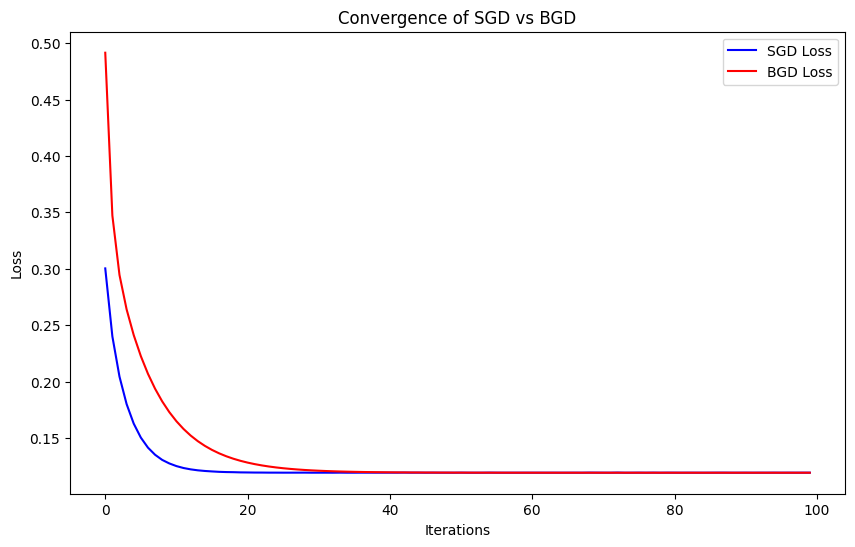

In [ ]:
import matplotlib.pyplot as plt

# Initialize parameters
m, n = X_train.shape
theta_sgd = np.zeros(n)  # Weights for SGD
theta_bgd = np.zeros(n)  # Weights for BGD
bias_sgd = 0
bias_bgd = 0
learning_rate_sgd = 0.001
learning_rate_bgd=0.5
iterations = 100

# SGD
print("\nStochastic Gradient Descent:")
theta_sgd, bias_sgd, loss_sgd = gradient_descent(X_train, y_train.values.flatten().tolist(),
                                                 theta_sgd, bias_sgd, learning_rate_sgd, iterations)

# BGD
print("\nBatch Gradient Descent:")
theta_bgd, bias_bgd, loss_bgd = batch_gradient_descent(X_train, y_train, theta_bgd,
                                                       bias_bgd, learning_rate_bgd, iterations)

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_sgd)), loss_sgd, label='SGD Loss', color='blue')
plt.plot(range(len(loss_bgd)), loss_bgd, label='BGD Loss', color='red')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Convergence of SGD vs BGD")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


m, n = X_train.shape
theta = np.zeros((n, 1))  # weights for each column of X_train
bias = 0  # bias term
learning_rate = 0.001
iterations = 100

theta_linear, bias_linear, loss_history_linear = gradient_descent(
    X_train, y_train, theta, bias, learning_rate, iterations
)

# Predict using trained linear model
y_pred_linear = np.dot(X_test, theta_linear) + bias_linear

# Add polynomial features (degree=2 for simplicity)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

# Train polynomial regression (gradient descent)
m_poly, n_poly = X_train_poly.shape
theta_poly = np.zeros((n_poly, 1))
bias_poly = 0

theta_poly, bias_poly, loss_history_poly = gradient_descent(
    X_train_poly, y_train, theta_poly, bias_poly, learning_rate, iterations
)

# Predict using trained polynomial model
y_pred_poly = np.dot(X_test_poly, theta_poly) + bias_poly

# Print Mean Squared Errors
print("Mean Squared Error (Linear Regression):", mean_squared_error(y_test, y_pred_linear))
print("Mean Squared Error (Polynomial Regression):", mean_squared_error(y_test, y_pred_poly))


Iteration 0: Loss = [0.3007909]
Iteration 10: Loss = [0.12513553]
Iteration 20: Loss = [0.11949597]
Iteration 30: Loss = [0.11929298]
Iteration 40: Loss = [0.11928916]
Iteration 50: Loss = [0.1193136]
Iteration 60: Loss = [0.1193029]
Iteration 70: Loss = [0.11929063]
Iteration 80: Loss = [0.11929331]
Iteration 90: Loss = [0.1193063]
Iteration 99: Loss = [0.11929051]
Iteration 0: Loss = [0.21253108]
Iteration 10: Loss = [0.08342902]
Iteration 20: Loss = [0.08149335]
Iteration 30: Loss = [0.08101504]
Iteration 40: Loss = [0.08100752]
Iteration 50: Loss = [0.08075145]
Iteration 60: Loss = [0.08064988]
Iteration 70: Loss = [0.08106065]
Iteration 80: Loss = [0.08092719]
Iteration 90: Loss = [0.08059324]
Iteration 99: Loss = [0.08057565]
Mean Squared Error (Linear Regression): 0.20778319652621846
Mean Squared Error (Polynomial Regression): 0.1440304122244508


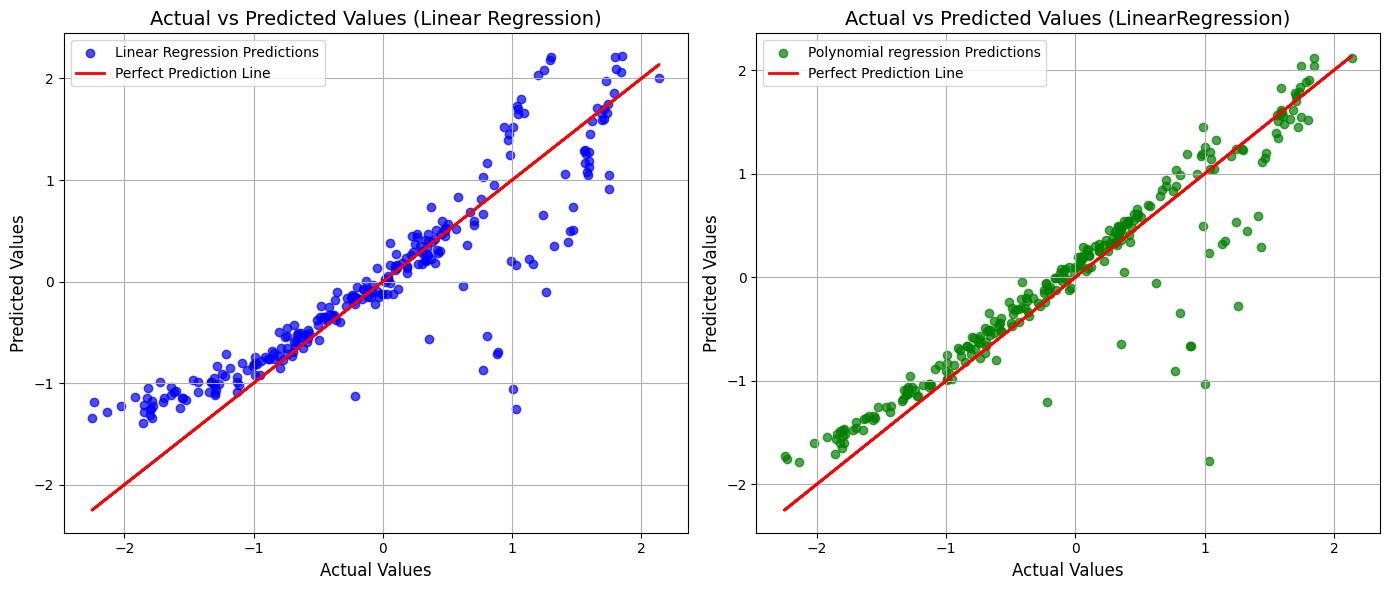

In [ ]:
plt.figure(figsize=(14, 6))

# Gradient Descent Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.7, label='Linear Regression Predictions')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted Values (Linear Regression)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)

# Scikit-Learn LinearRegression Model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.7, label='Polynomial regression Predictions')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs Predicted Values (LinearRegression)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()